In [73]:
'''
3. Relate entities in MP's questions to constituencies
'''

"\n3. Relate entities in MP's questions to constituencies\n"

In [3]:
import pandas as pd
import geopandas as gpd
# load in MP_geometry

MP_geometry = pd.read_csv("../data/MP_geometry.csv")

question_locations = pd.read_csv("../data/question_locations_full.csv")

In [4]:
# converts MP_geometry geometry column to type geometry
MP_geometry['geometry'] = gpd.GeoSeries.from_wkt(MP_geometry['geometry'])
MP_geometry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   const        669 non-null    object  
 1   person       669 non-null    object  
 2   personLabel  669 non-null    object  
 3   constLabel   669 non-null    object  
 4   geometry     669 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 26.3+ KB


In [5]:
'''
Checks for each entity which constituency it belongs and then adds it to the new constituency column
'''
import shapely
entity_const = question_locations.copy()
# help from https://stackoverflow.com/questions/7861196/check-if-a-geopoint-with-latitude-and-longitude-is-within-a-shapefile

# adds a new column to question_locations_df
entity_const["const"] = None


for index, row in entity_const.iterrows():
    point = shapely.geometry.Point(row["easting"], row["northing"])
    for index2, row2 in MP_geometry.iterrows():
        if row2["geometry"].contains(point):
            print(index)
            entity_const.at[index, "const"] = row2["constLabel"]
            break

0
1
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
223
224
225
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283


In [6]:
# show entities that do not have a constituency
# these are mainly rivers or where wikipedia has put the coordinates in the sea
entity_const[entity_const["const"].isnull()]

,question,entity,easting,northing,wikipedia,const
2,https://id.parliament.uk/oHeIeP9G,River_Tees,455114.463816,528466.390692,https://en.wikipedia.org/wiki/River_Tees,None
110,https://id.parliament.uk/kCXThQ8A,National_Cyber_Security_Centre_(Ireland),116782.669827,390144.965280,https://en.wikipedia.org/wiki/National_Cyber_S...,None
128,https://id.parliament.uk/XNaAfVIs,National_Cyber_Security_Centre_(Ireland),116782.669827,390144.965280,https://en.wikipedia.org/wiki/National_Cyber_S...,None
220,https://id.parliament.uk/eIPt42gK,English_Channel,400096.103588,33330.401104,https://en.wikipedia.org/wiki/English_Channel,None
221,https://id.parliament.uk/8kWXGOpu,English_Channel,400096.103588,33330.401104,https://en.wikipedia.org/wiki/English_Channel,None
...,...,...,...,...,...,...
2383,https://id.parliament.uk/zCGJsRDq,Humber,538740.556828,407153.441365,https://en.wikipedia.org/wiki/Humber,None
2446,https://id.parliament.uk/w0idvLLy,Humber,538740.556828,407153.441365,https://en.wikipedia.org/wiki/Humber,None
2452,https://id.parliament.uk/gChiL6fx,Humber,538740.556828,407153.441365,https://en.wikipedia.org/wiki/Humber,None
2499,https://id.parliament.uk/G7IGTcIW,English_Channel,400096.103588,33330.401104,https://en.wikipedia.org/wiki/English_Channel,None


In [7]:
entity_const[entity_const["const"].isnull()]["entity"].unique()

array(['River_Tees', 'National_Cyber_Security_Centre_(Ireland)',
       'English_Channel', 'Humber', 'Hastings',
       'Dublin_Institute_of_Technology', 'Ireland', 'River_Tyne',
       'River_Wear', 'Isles_of_Scilly', 'Portland_Harbour',
       'Neart_Na_Gaoithe', 'HMS_Dasher_(D37)', 'River_Foyle',
       'Lough_Foyle', 'Strangford_Lough',
       'Strangford_(UK_Parliament_constituency)', 'Ulster'], dtype=object)

In [8]:
import numpy as np

# pick closest entites for these
for index, row in entity_const[entity_const["const"].isnull()].iterrows():
    shortest_dist = np.inf
    point = shapely.geometry.Point(row["easting"], row["northing"])
    for index2, row2 in MP_geometry.iterrows():
        dist = row2["geometry"].boundary.distance(point)

        if dist < shortest_dist:
            shortest_dist = dist
            closest_const = row2["constLabel"]
    entity_const.at[index, "const"] = closest_const

In [9]:
entity_const["entity"].value_counts() 

entity
North_East_England                                 45
York                                               34
Birmingham                                         32
Broxbourne_(UK_Parliament_constituency)            31
Portland_Harbour                                   31
                                                   ..
Exeter                                              1
North_West_Leicestershire                           1
Shipley_(UK_Parliament_constituency)                1
Elmet_and_Rothwell_(UK_Parliament_constituency)     1
Downing_Street_mortar_attack                        1
Name: count, Length: 802, dtype: int64

In [10]:
for index, row in entity_const.iterrows():
    print(row["entity"])

West_Midlands_(region)
Slough
River_Tees
Hounslow
Buckingham_(UK_Parliament_constituency)
Kingston_upon_Hull
Kingston_upon_Hull
Charing_Cross
Liverpool_Walton_(UK_Parliament_constituency)
Feltham
Heston
Dulwich
West_Norwood
York
Dulwich
West_Norwood
Dulwich
West_Norwood
York
York
Dulwich
West_Norwood
Dulwich
West_Norwood
Dulwich
West_Norwood
Dulwich
West_Norwood
Dulwich
West_Norwood
Dulwich
West_Norwood
Dulwich
West_Norwood
Dulwich
West_Norwood
Hornsey
Wood_Green
Dulwich
West_Norwood
Dulwich
West_Norwood
Kingston_upon_Hull
Kingston_upon_Hull
Dulwich
West_Norwood
Dulwich
West_Norwood
Royal_College_of_Nursing
Manchester
South_Yorkshire
11_Downing_Street
Glasgow_Airport
Heathrow_Airport
Hillsborough_Stadium
Hillsborough_Stadium
RAF_Northolt
Broxbourne_(UK_Parliament_constituency)
Ashridge
Newcastle_upon_Tyne
Heathrow_Airport
Heathrow_Airport
University_of_Kent
Hillsborough_Stadium
Scunthorpe
Port_Talbot
Chipping_Barnet
Newcastle_upon_Tyne
North_East_England
Bristol
North_Somerset
South_Gl

<Axes: >

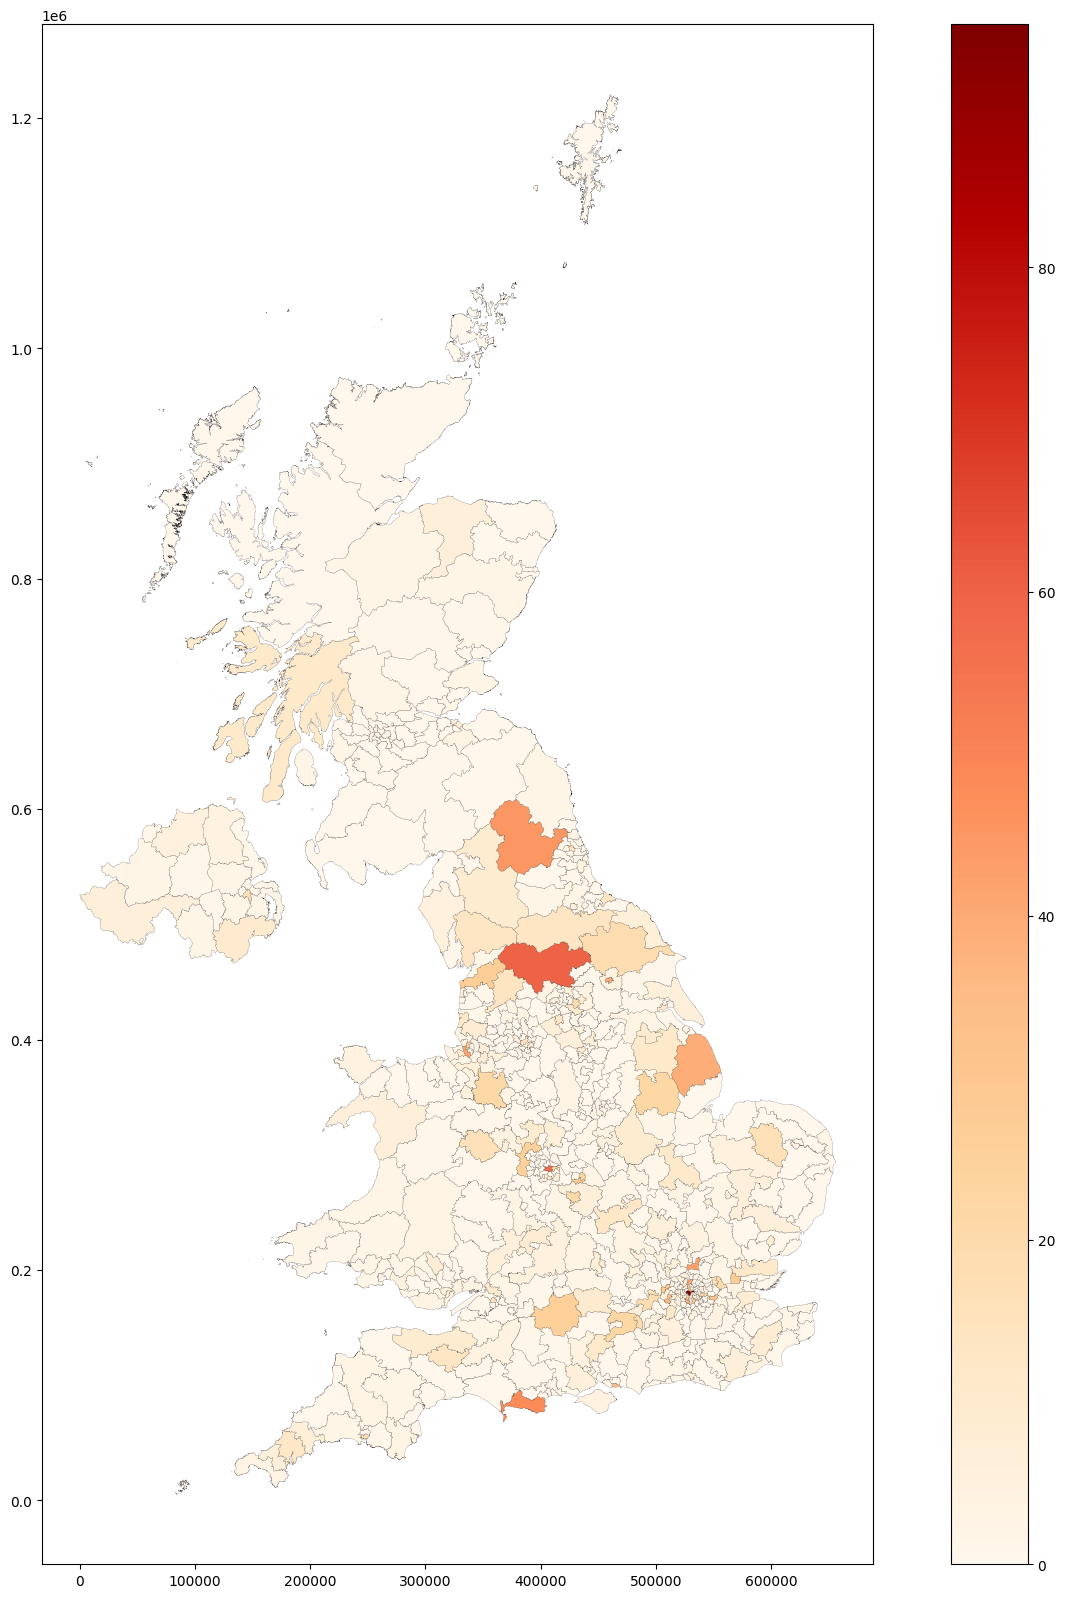

In [112]:
"""Number of questions that include each constituency"""

entity_occurrences = pd.DataFrame(entity_const.groupby("const")["question"].count().sort_values(ascending=False)).reset_index()
entity_occurrences.rename(columns={"question": "occurrences"}, inplace=True)
entity_occurrences = pd.merge(MP_geometry[["constLabel", "geometry"]], entity_occurrences, left_on="constLabel", right_on="const", how="left")
entity_occurrences.drop(columns="const", inplace=True)

entity_occurrences = gpd.GeoDataFrame(entity_occurrences)
# set default geomter


entity_occurrences.fillna(0, inplace=True)
entity_occurrences
entity_occurrences = entity_occurrences.set_geometry("geometry")
entity_occurrences.sort_values("occurrences", ascending=False)
entity_occurrences.plot(column="occurrences", legend=True, figsize=(20, 20), cmap="OrRd" , edgecolor="black", linewidth=0.1) #cmap="OrRd"

In [13]:
# load csv
questions = pd.read_csv('../data/questions.csv')
questions.columns

Index(['question', 'qnum', 'person', 'wikidataperson', 'text', 'date'], dtype='object')

In [60]:
joined_df = pd.merge(
        # merge the constituencies of entities with the question that asked them
        pd.merge(
            entity_const, questions, how="left", right_on="question", left_on="question"
            ), 
            # merge this with the MP's who asked the question and their constituency
            MP_geometry, how="left", left_on="wikidataperson", right_on="person")



# a question was asked about this constituency by this MP who is from and has this area.
joined_df= joined_df[["question", "const_x", "personLabel", "constLabel", "geometry"]]

# rename
joined_df.rename(columns={"const_x":"question_const", "personLabel":"MP", "constLabel":"MP_const", "geometry":"MP_const_geometry"}, inplace=True)

In [61]:
joined_df.question_const.value_counts()
joined_df

,question,question_const,MP,MP_const,MP_const_geometry
0,https://id.parliament.uk/wne3Q3kQ,South Staffordshire,Steve McCabe,Birmingham Selly Oak,"POLYGON ((402823.398 282975.698, 402819.399 28..."
1,https://id.parliament.uk/Q0uNVDhz,Slough,Tanmanjeet Singh Dhesi,Slough,"POLYGON ((494342.702 178838.997, 494338.497 17..."
2,https://id.parliament.uk/oHeIeP9G,Redcar,Rachael Maskell,York Central,"POLYGON ((461843.903 454083.299, 461851.703 45..."
3,https://id.parliament.uk/W7K6780e,Feltham and Heston,Ruth Cadbury,Brentford and Isleworth,"POLYGON ((521351.824 179500.313, 521353.700 17..."
4,https://id.parliament.uk/e9R3Yc8s,Buckingham,Julian Knight,Solihull,"POLYGON ((416312.499 283687.905, 416335.898 28..."
...,...,...,...,...,...
2580,https://id.parliament.uk/KBjXJ9mO,Portsmouth South,Stephen Morgan,Portsmouth South,"MULTIPOLYGON (((463418.899 101737.297, 464118...."
2581,https://id.parliament.uk/51DqbupU,Tooting,Rosena Allin-Khan,Tooting,"POLYGON ((525760.499 174242.503, 525769.000 17..."
2582,https://id.parliament.uk/c7mhUeV3,North Antrim,Andrew Rosindell,Romford,"POLYGON ((548106.898 193800.904, 548224.704 19..."
2583,https://id.parliament.uk/Py4BvdeG,Cities of London and Westminster,Emily Thornberry,Islington South and Finsbury,"POLYGON ((529818.713 184985.372, 529825.652 18..."


<Axes: >

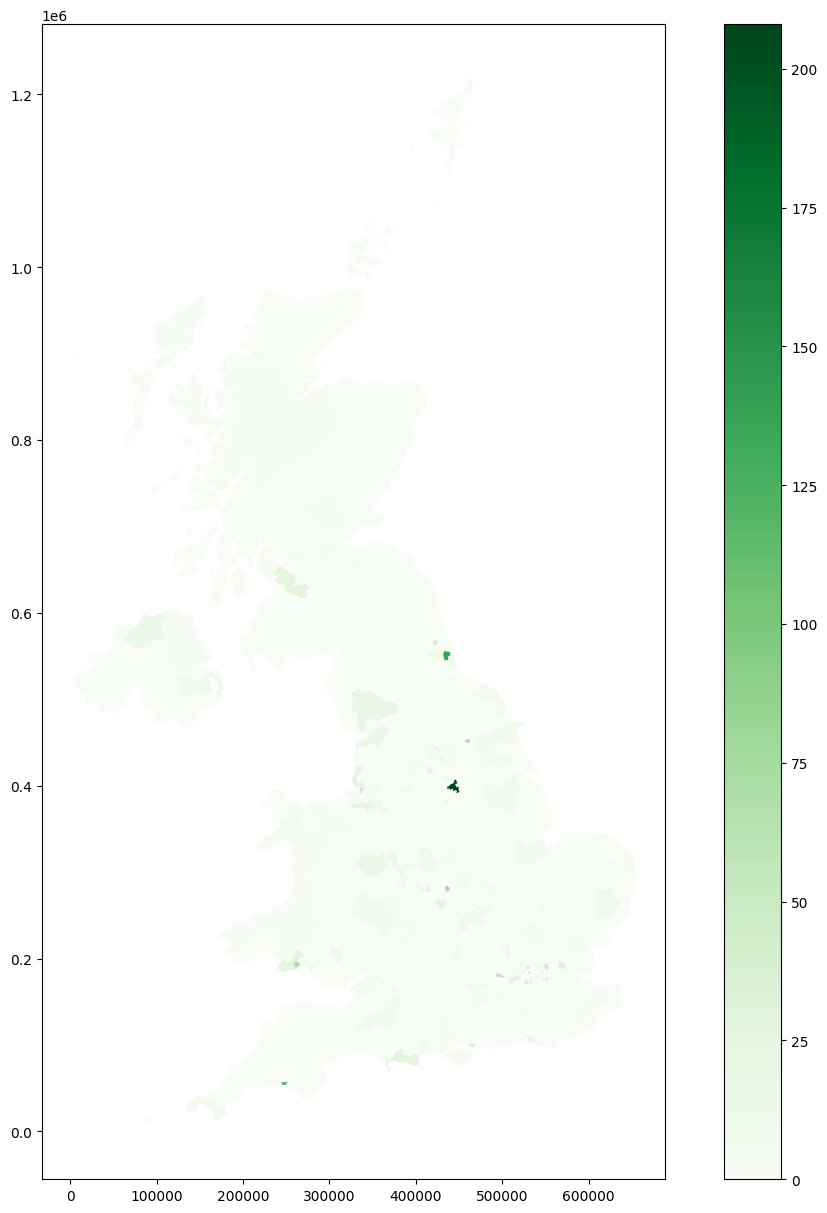

In [117]:
import matplotlib.pyplot as plt

"""Number of questions per constituency that include an entity"""
const_questions = pd.DataFrame(joined_df.groupby("MP_const")["MP"].count().sort_values(ascending=False)).reset_index()
const_questions.rename(columns={"MP": "questions"}, inplace=True)
const_questions
const_questions = pd.merge(MP_geometry[["constLabel", "geometry"]], const_questions, left_on="constLabel", right_on="MP_const", how="left")
const_questions.drop(columns="MP_const", inplace=True)
const_questions = const_questions.set_geometry("geometry")
const_questions.fillna(0, inplace=True)
fig, ax = plt.subplots(figsize=(15, 15))
const_questions.plot(ax=ax, column="questions", legend=True, cmap="Greens") #cmap="OrRd"

In [86]:
const_questions[const_questions["questions"] == 208]

# go through all questions of Wentworth and Dearne
for index, row in joined_df[joined_df["MP_const"] == "Wentworth and Dearne"].iterrows():
    print(row)

question                             https://id.parliament.uk/kCXThQ8A
question_const                                              South Down
MP                                                         John Healey
MP_const                                          Wentworth and Dearne
MP_const_geometry    POLYGON ((436259.0991 397360.0963, 436257.5985...
Name: 110, dtype: object
question                             https://id.parliament.uk/XNaAfVIs
question_const                                              South Down
MP                                                         John Healey
MP_const                                          Wentworth and Dearne
MP_const_geometry    POLYGON ((436259.0991 397360.0963, 436257.5985...
Name: 128, dtype: object
question                             https://id.parliament.uk/AV1R93Pg
question_const                                              South Down
MP                                                         John Healey
MP_const                   

<Axes: >

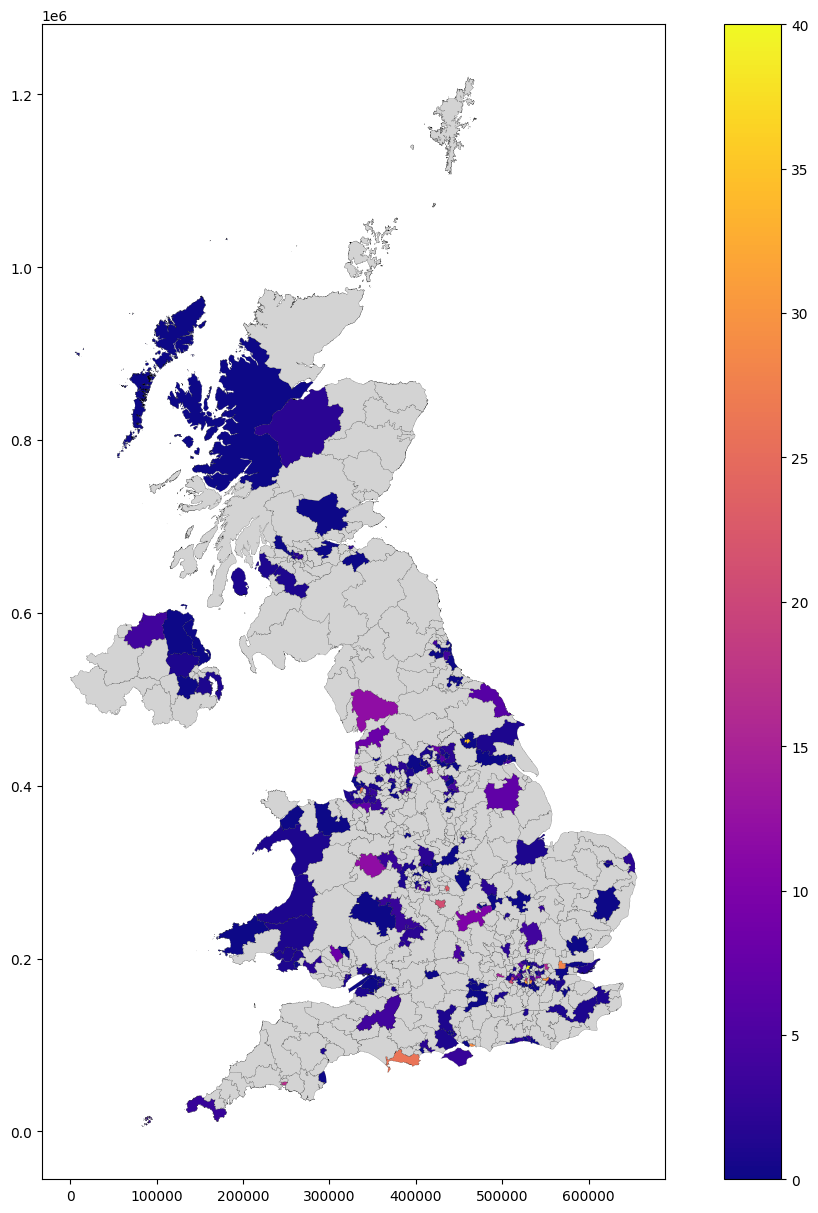

In [124]:
"""
Number of question made by MP's about their own constituency

"""


# count the number of times for each question that the MP's constituency as the question's constituency
joined_df["same_const"] = joined_df["question_const"] == joined_df["MP_const"]


same_const = joined_df.groupby("MP_const")["same_const"].sum().sort_values(ascending=False).reset_index()
same_const = pd.merge(MP_geometry[["constLabel", "geometry"]], same_const, left_on="constLabel", right_on="MP_const", how="left")
same_const.drop(columns="MP_const", inplace=True)
same_const = same_const.set_geometry("geometry")

fig, ax = plt.subplots(figsize=(15, 15))
same_const.plot(ax=ax, column="same_const", legend=True, cmap="plasma", edgecolor="black", linewidth=0.1) #cmap="OrRd"
same_const[same_const["same_const"].isnull()].plot(ax=ax, color="lightgrey", edgecolor="black", linewidth=0.1)

In [ ]:
entity_const

,question,entity,easting,northing,wikipedia,const
0,https://id.parliament.uk/wne3Q3kQ,West_Midlands_(region),382689.369764,286801.459728,https://en.wikipedia.org/wiki/West_Midlands_(r...,South Staffordshire
1,https://id.parliament.uk/Q0uNVDhz,Slough,498082.779241,179773.798368,https://en.wikipedia.org/wiki/Slough,Slough
2,https://id.parliament.uk/oHeIeP9G,River_Tees,455114.463816,528466.390692,https://en.wikipedia.org/wiki/River_Tees,Redcar
3,https://id.parliament.uk/W7K6780e,Hounslow,512974.190267,175455.283371,https://en.wikipedia.org/wiki/Hounslow,Feltham and Heston
4,https://id.parliament.uk/e9R3Yc8s,Buckingham_(UK_Parliament_constituency),469572.352087,233989.735822,https://en.wikipedia.org/wiki/Buckingham_(UK_P...,Buckingham
...,...,...,...,...,...,...
2745,https://id.parliament.uk/KBjXJ9mO,Portsmouth,464413.884270,101094.379827,https://en.wikipedia.org/wiki/Portsmouth,Portsmouth South
2746,https://id.parliament.uk/51DqbupU,HM_Prison_Wandsworth,526728.635699,173925.158213,https://en.wikipedia.org/wiki/HM_Prison_Wandsw...,Tooting
2747,https://id.parliament.uk/c7mhUeV3,Rathlin_Island,133639.823902,608129.542743,https://en.wikipedia.org/wiki/Rathlin_Island,North Antrim
2748,https://id.parliament.uk/Py4BvdeG,Downing_Street_mortar_attack,530021.784566,179958.304242,https://en.wikipedia.org/wiki/Downing_Street_m...,Cities of London and Westminster


In [ ]:
MP_geometry

,const,person,personLabel,constLabel,geometry
0,http://www.wikidata.org/entity/Q874194,http://www.wikidata.org/entity/Q27671735,Robert Courts,Witney,"POLYGON ((442095.596 201006.402, 442061.503 20..."
1,http://www.wikidata.org/entity/Q1077357,http://www.wikidata.org/entity/Q30165536,Tonia Antoniazzi,Gower,"POLYGON ((266481.698 209849.500, 266493.299 20..."
2,http://www.wikidata.org/entity/Q3336017,http://www.wikidata.org/entity/Q30165682,Alister Jack,Dumfries and Galloway,"MULTIPOLYGON (((266001.597 603288.500, 266016...."
3,http://www.wikidata.org/entity/Q3134218,http://www.wikidata.org/entity/Q30165748,Liz Twist,Blaydon,"POLYGON ((411599.496 556797.514, 411599.430 55..."
4,http://www.wikidata.org/entity/Q3133785,http://www.wikidata.org/entity/Q30176559,David Duguid,Banff and Buchan,"MULTIPOLYGON (((352324.388 867640.741, 352328...."
...,...,...,...,...,...
664,http://www.wikidata.org/entity/Q1080518,http://www.wikidata.org/entity/Q76449017,Simon Jupp,East Devon,"POLYGON ((294508.731 96046.540, 294508.510 960..."
665,http://www.wikidata.org/entity/Q1077598,http://www.wikidata.org/entity/Q76450642,Jane Hunt,Loughborough,"POLYGON ((450929.602 315678.597, 450928.201 31..."
666,http://www.wikidata.org/entity/Q1072775,http://www.wikidata.org/entity/Q76450728,Kate Osborne,Jarrow,"POLYGON ((435134.003 566077.102, 435320.399 56..."
667,http://www.wikidata.org/entity/Q1070140,http://www.wikidata.org/entity/Q76736577,Greg Smith,Buckingham,"POLYGON ((460619.899 235588.003, 460625.870 23..."


In [ ]:
entity_const.to_csv("../data/entity_const.csv", index=False)